In [2]:
import pandas as pd
import numpy as np
import matplotlib.axes as axis
import matplotlib.pyplot as plt

Let's check what the number of anime that have been loaded in the main csv file:


In [3]:
fullDF = pd.read_csv('anime_data.csv')
print(fullDF.info())    #Gives the total sets of data and the data type of each column
null_count = fullDF.isnull().sum()
print(null_count)  #Count the number of nulls in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3205 entries, 0 to 3204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3205 non-null   int64  
 1   title         3205 non-null   object 
 2   startDate     3205 non-null   object 
 3   popularity    3205 non-null   int64  
 4   favourites    3205 non-null   int64  
 5   tags          3205 non-null   object 
 6   genres        3205 non-null   object 
 7   averageScore  3205 non-null   int64  
 8   episodes      3205 non-null   int64  
 9   duration      3203 non-null   float64
 10  description   3202 non-null   object 
 11  studios       3205 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 300.6+ KB
None
id              0
title           0
startDate       0
popularity      0
favourites      0
tags            0
genres          0
averageScore    0
episodes        0
duration        2
description     3
studios         0
dtype:

Now let's do the same but for the other dataframe


<h2>Reformatting the Data </h2></br>
<p>Let's start by removing the NaN values in the dataset. </p>

In [4]:
fullDF = fullDF.dropna()
print(fullDF.info()) 
#I want to view all the null values anime

#print(df_nan)  #Count the number of nulls in our dataset


<class 'pandas.core.frame.DataFrame'>
Index: 3201 entries, 0 to 3204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3201 non-null   int64  
 1   title         3201 non-null   object 
 2   startDate     3201 non-null   object 
 3   popularity    3201 non-null   int64  
 4   favourites    3201 non-null   int64  
 5   tags          3201 non-null   object 
 6   genres        3201 non-null   object 
 7   averageScore  3201 non-null   int64  
 8   episodes      3201 non-null   int64  
 9   duration      3201 non-null   float64
 10  description   3201 non-null   object 
 11  studios       3201 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 325.1+ KB
None


Let's make the Titles a little better

In [5]:
#Creat a new dataframe with json_normalize function
#This pandas function will convert the dictionary data into a dataframe
titleData = fullDF['title'].str.split(', \'', expand=True)
titleData.columns = ['Romaji', 'English']
titleData['Romaji'] = titleData['Romaji'].str.replace('{\'romaji\': \'', '')
titleData['Romaji'] = titleData['Romaji'].str.replace('\'', '')
titleData['English'] = titleData['English'].str.replace('english\': \'', '')
titleData['English'] = titleData['English'].str.replace('\'}', '')

fullDF = fullDF.drop(axis=1, columns='title')   #once this runs, the title column will be removed forever, so rerun the code from the beginning
fullDF.insert(loc=1, column=titleData.columns[0], value=titleData['Romaji'])
fullDF.insert(loc=2, column=titleData.columns[1], value=titleData['English'])
#Same for the startDate column
fullDF['startDate'] = fullDF['startDate'].str.replace('{\'year\': ', '')
fullDF['startDate'] = fullDF['startDate'].str.replace('}', '')
fullDF['English'] = fullDF['English'].str.lower()
fullDF['Romaji'] = fullDF['Romaji'].str.lower()
print(fullDF.head())
#df_title = pd.json_normalize(fullDF['title'])


       id                 Romaji                         English startDate  \
0   16498     shingeki no kyojin                 attack on titan      2013   
1  101922       kimetsu no yaiba  demon slayer: kimetsu no yaiba      2019   
2    1535             death note                      death note      2006   
3  113415         jujutsu kaisen                  jujutsu kaisen      2020   
4   21459  boku no hero academia                my hero academia      2016   

   popularity  favourites                                               tags  \
0      769756       48653  [{'name': 'Survival'}, {'name': 'Kaiju'}, {'na...   
1      727599       39973  [{'name': 'Demons'}, {'name': 'Shounen'}, {'na...   
2      700617       38859  [{'name': 'Crime'}, {'name': 'Detective'}, {'n...   
3      668266       48203  [{'name': 'Urban Fantasy'}, {'name': 'Shounen'...   
4      666087       19848  [{'name': 'Super Power'}, {'name': 'Superhero'...   

                                              genr

Let us plot down the top 10 anime, according to scores and popularity.

Text(0.5, 1.0, 'Top 10 Popular Anime')

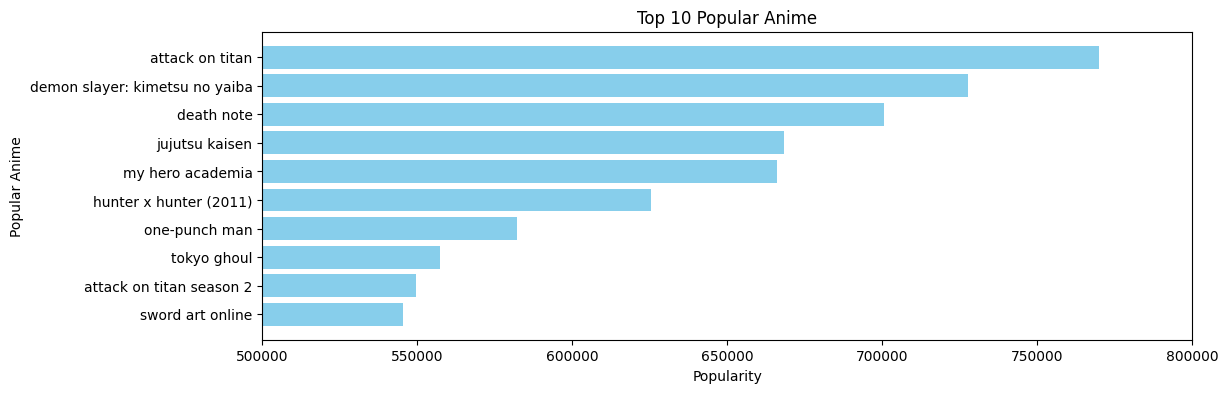

In [6]:
popular = fullDF[["Romaji", "English", "popularity"]] 
plt.figure(figsize=(12, 4))

plt.barh(popular['English'][:10], popular['popularity'][:10], color='skyblue', align='center')
plt.gca().invert_yaxis()
plt.xlim(500000, 800000)
plt.xlabel('Popularity')
plt.ylabel('Popular Anime')
plt.title('Top 10 Popular Anime')

Text(0.5, 1.0, 'Top 10 Anime')

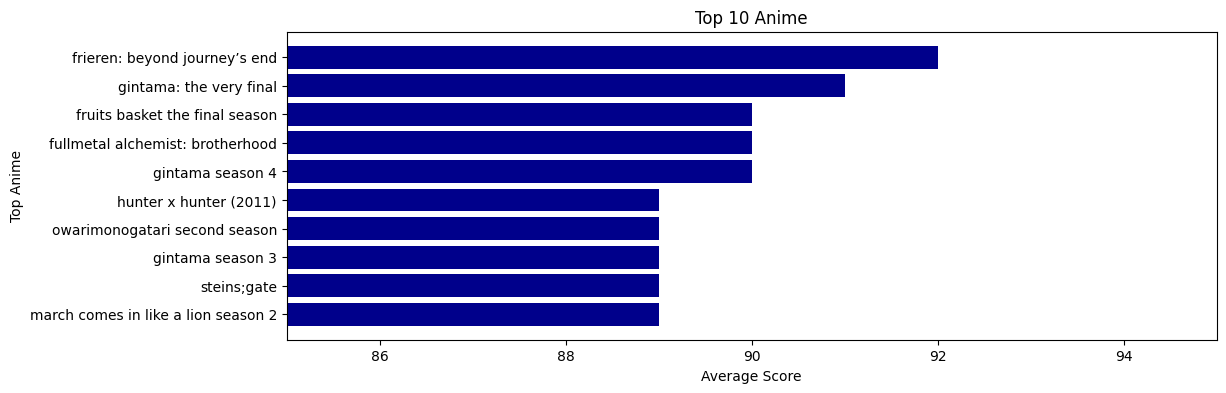

In [7]:
sortedDF = fullDF[["Romaji", "English", "averageScore", "favourites", "popularity"]]
sortedDF = sortedDF.sort_values(by='averageScore', ascending=False)
scores = sortedDF[["English", "averageScore"]]
plt.figure(figsize=(12, 4))

plt.barh(scores['English'][:10], scores['averageScore'][:10], color='darkblue', align='center')
plt.gca().invert_yaxis()
plt.xlim(85, 95)
plt.xlabel('Average Score')
plt.ylabel('Top Anime')
plt.title('Top 10 Anime')

From the above graph we see that there are multiple anime with the same score. Also, Gintama has way too many highly rated seasons. Using the popularity and score alone for a recommendations can be a failure since the anime's above have really unrelated plots, well except maybe Gintama.

This is what my plan is, convert the genres column into a bigger Genres column that has all the genres as smaller seperate columns. If the anime has that genre used in it, it would have a 1, else a 0. 

on 01/06/2024<h2>THIS IS IDEA IS ACTUALLY CORRECT!!!!!!! IT'S CALLED COUNT VECTORIZER</h2>

Given up on that idea, lol, instead here's a cleaner version of tags, genres and studios. I have first cleaned them by removing the wierd name: thing from the tags and similar in the studios columns, I have removed the nodes: name: part and only kept the studios. Everyone has tags, genre and studios as objects in a column, or a list of objects. 


In [8]:
df_change = fullDF['genres'].str.split(',').tolist()
#I have a list or lists.
#Each list of list contains a string
#The String has not only words but also other shit in it
#I want to remove the other shit
genreList = []
for i in range(len(df_change)):
    for j in range(len(df_change[i])):
         string = df_change[i][j]
         df_change[i][j]= ''.join(letter.lower() for letter in string if letter.isalnum())
         #adding into out genre list
         if df_change[i][j] not in genreList:
            genreList.append(df_change[i][j])
fullDF['genres'] = df_change
genreList.pop()
#print(genreList)


#Let's do the same but for tags
tagsDF = fullDF['tags'].str.split(', ').tolist()
for i in range(len(tagsDF)):
    for j in range(len(tagsDF[i])):
        tags = tagsDF[i][j]
        tagsDF[i][j] = ''.join(letter.lower() for letter in tags if letter.isalnum())
        tagsDF[i][j] = tagsDF[i][j].replace("name", "")
fullDF['tags'] = tagsDF


#Lets do the same but for studios
studDF = fullDF['studios'].str.split(', ').tolist()
for i in range(len(studDF)):
    for j in range(len(studDF[i])):
        studs = studDF[i][j]
        studDF[i][j] = ''.join(letter.lower() for letter in studs if letter.isalnum())
        studDF[i][j] = studDF[i][j].replace("nodesname", "")
    studDF[i] = ''.join(studDF[i][0])
fullDF['studios'] = studDF

In [9]:
print(fullDF.head())
#print(fullDF.columns)

       id                 Romaji                         English startDate  \
0   16498     shingeki no kyojin                 attack on titan      2013   
1  101922       kimetsu no yaiba  demon slayer: kimetsu no yaiba      2019   
2    1535             death note                      death note      2006   
3  113415         jujutsu kaisen                  jujutsu kaisen      2020   
4   21459  boku no hero academia                my hero academia      2016   

   popularity  favourites                                               tags  \
0      769756       48653  [survival, kaiju, tragedy, shapeshifting, mili...   
1      727599       39973  [demons, shounen, swordplay, maleprotagonist, ...   
2      700617       38859  [crime, detective, antihero, maleprotagonist, ...   
3      668266       48203  [urbanfantasy, shounen, superpower, youkai, ma...   
4      666087       19848  [superpower, superhero, shounen, primarilyteen...   

                                              genr

Now all the tags and genres have become iterable objects instead of dead strings. Now we can easily convert them into some form of vectors</br>
If we want we can also use the studios column in out recommendations...</br>

Let's use scikit learns CountVectorizer to create a matrix of 1s and 0s of the tags, genres and studios. First we will need to make a datafram that only uses those specific features. So now lets create a  'metadata soup', or let's just mix all the datas we cleaned thus far.

In [10]:
def create_soup(x):
    return ' '.join(x['genres']) + ' ' + ' '.join(x['tags']) + ' ' + x['studios'] 
fullDF['soup'] = fullDF.apply(create_soup, axis=1)

This has now created a new column with genre, tags, and studios as a string

In [11]:
#Importing CountVectorizer and creating the count matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

numFeatures = ['popularity', 'favourites', 'averageScore']
numMatrix = fullDF[numFeatures].to_numpy()

vectorizer = CountVectorizer(stop_words='english')
soup_matrix = vectorizer.fit_transform(fullDF['soup'])
print(soup_matrix.toarray())

features = np.concatenate((soup_matrix.toarray(), numMatrix), axis=1)

#computing the Cosine Similarity matrix based on the features
cosine_sim = cosine_similarity(features, features)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
#print(test(fullDF))

In [13]:
#Construct a reverse map of indices and anime titles
#Now we can access the index of a particular anime in our main DataFrame using the 
indicesR = pd.Series(fullDF.index, index=fullDF['Romaji'])
indicesE = pd.Series(fullDF.index, index=fullDF['English'])
print(indicesR.head())  
print(indicesE.head())  

Romaji
shingeki no kyojin       0
kimetsu no yaiba         1
death note               2
jujutsu kaisen           3
boku no hero academia    4
dtype: int64
English
attack on titan                   0
demon slayer: kimetsu no yaiba    1
death note                        2
jujutsu kaisen                    3
my hero academia                  4
dtype: int64


Finally creating a recommendations function, that will provide us a list of anime as reccomendations. Let's make it such that we can run different Models and Methods through it.</br>
The function should work as following

<li>Get the index of the anime, given the title, either in English or Romaji.
<li>Get the list of Cosine Similarity score, for the particular anime. Convert it into a list of tuples where the first element is its position and the second element is the score. In python, the sorted function efficiently sorts a list of tuples, hence we convert it into tuples.
<li>Sort the list of tuples based on the similarity scores 
<li>Get the top 11 anime, ignore the first anime in the list, as it would give the anime itself. 
<li>Return the titles corresponding to the indices of the top elements.

In [14]:
def getReccomendations(title,num, cosine_sim=cosine_sim):
    #Get the index of the anime that matches the title
    title = title.lower()
    try:
        idx = indicesR[title] if title in indicesR else indicesE[title]
    except:
        print("Anime not found")
        return None
    
    #get the list of cosine similarity scores for that particular anime with all anime
    if (num == 0):
        animeFeatures = features[idx].reshape(1, -1)
        knn = NearestNeighbors(n_neighbors=11, algorithm='auto').fit(features)
        distances, indices = knn.kneighbors(animeFeatures)
        recommendIDs = indices.flatten()[1:]
        return fullDF.iloc[recommendIDs]
    #Working for the KNearestNeighbours Model
    elif (num == 1):
        simScoreList = list(enumerate(cosine_sim[idx]))
        simScoreList = sorted(simScoreList, key= lambda x: x[1] , reverse=True)
        simScoreList = simScoreList[1:11]
        animeIndex = [i[0] for i in simScoreList]
        return fullDF.iloc[animeIndex]
    elif (num == 2):
        animeFeatures = features[idx].reshape(1, -1)
        knn = NearestNeighbors(n_neighbors=11, algorithm='auto', metric='canberra').fit(features)
        distances, indices = knn.kneighbors(animeFeatures)
        recommendIDs = indices.flatten()[1:]
        return fullDF.iloc[recommendIDs] 
    elif (num == 3):
        animeFeatures = features[idx].reshape(1, -1)
        knn = NearestNeighbors(n_neighbors=11, algorithm='auto', metric='dice').fit(features)
        distances, indices = knn.kneighbors(animeFeatures)
        recommendIDs = indices.flatten()[1:]
        return fullDF.iloc[recommendIDs] 
    elif (num == 4):
        animeFeatures = features[idx].reshape(1, -1)
        knn = NearestNeighbors(n_neighbors=11, algorithm='auto', metric='yule').fit(features)
        distances, indices = knn.kneighbors(animeFeatures)
        recommendIDs = indices.flatten()[1:]
        return fullDF.iloc[recommendIDs] 
    else:
        return "wrong number!!"

In [16]:
#Enter 0 or 1 for the second parameter
#0 for Metric = Minkowski Distance(default KNN Metric)
#1 for Metric = Cosine Similarity
#2 for Metric = Canberra Distance or Dice, SPECIALLY FOR RomComs
#3 for Metric = Dice Distance, SPECIALLY for Comedy Shows
recommend = getReccomendations('horimiya', 2) 
print(recommend[['id', 'Romaji', 'English', 'averageScore']])

          id                                             Romaji  \
527   163132                                    horimiya: piece   
1542   14753                hori-san to miyamura-kun: shingakki   
165    14227                             tonari no kaibutsu-kun   
31      4224                                          toradora!   
1116  166216           boku no kokoro no yabai yatsu 2nd season   
255    98291                                 tsurezure children   
322    99468                        karakai jouzu no takagi-san   
680   107068                      karakai jouzu no takagi-san 2   
909    21296  zutto mae kara suki deshita.: kokuhaku jikkou ...   
637   153152                      boku no kokoro no yabai yatsu   

                                 English  averageScore  
527         horimiya: the missing pieces            82  
1542                     english': none}            71  
165                    my little monster            72  
31                             tor